## Download Dataset From Kaggle into Google Drive
source: https://www.kaggle.com/sshikamaru/fruit-recognition

In [ ]:
#mount at gdrive
from google.colab import drive
drive.mount('/drive',force_remount=True)

Mounted at /drive


In [ ]:
# Import OS for navigation and environment set up
import os
# Check current location, '/content' is the Colab virtual machine
!pwd
# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
os.environ['KAGGLE_CONFIG_DIR'] = '/drive/MyDrive/kaggle'

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
pwd: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected


In [ ]:
#install Kaggle
#!pip install kaggle

In [ ]:
# Navigate into Drive where you want to store your Kaggle data
os.chdir('../drive/MyDrive/kaggle')
# Paste and run the copied API command, the data will download to the current directory
!kaggle datasets download -d sshikamaru/fruit-recognition
# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

 93% 95.0M/102M [00:02<00:00, 8.60MB/s]
100% 102M/102M [00:02<00:00, 35.8MB/s] 


['kaggle.json', 'train', 'test', 'fruit-recognition.zip']

In [ ]:
# Complete path to storage location of the .zip file of data
zip_path = '/drive/MyDrive/kaggle/fruit-recognition.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
#os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip 'fruit-recognition.zip'
# View the unzipped contents in the virtual machine
os.listdir()

cp: '/drive/MyDrive/kaggle/fruit-recognition.zip' and './fruit-recognition.zip' are the same file
Archive:  fruit-recognition.zip
replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


'/drive/My Drive/kaggle'

## CNN

### Import Libraries

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### Directories

In [ ]:
#create training directory
train_dir='/drive/MyDrive/kaggle/train/train'
#create test directory
test_dir='/drive/MyDrive/kaggle/test'

### Data Generator (Image Preprocessing)

In [ ]:
img_datagen = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)


train_generator = img_datagen.flow_from_directory(train_dir,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100)) #resize to 100x100

valid_generator = img_datagen.flow_from_directory(train_dir,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

Found 5641 images belonging to 1 classes.
Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


### Create Model

In [ ]:
model = Sequential()

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(33, activation='softmax')
    ])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

Callback

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy') >= 0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                        restore_best_weights=True)

Training Model

In [ ]:
history = model.fit(train_generator, validation_data=valid_generator,
                   steps_per_epoch=train_generator.n//train_generator.batch_size,
                   validation_steps=valid_generator.n//valid_generator.batch_size,
                    callbacks=[early],
                   epochs=10)

Epoch 1/10
421/421 [==============================] - 3466s 8s/step - loss: 1.9176 - accuracy: 0.4199 - val_loss: 0.9677 - val_accuracy: 0.6449
Epoch 2/10
421/421 [==============================] - 293s 696ms/step - loss: 0.6509 - accuracy: 0.7762 - val_loss: 0.5121 - val_accuracy: 0.8188
Epoch 3/10
421/421 [==============================] - 294s 698ms/step - loss: 0.4103 - accuracy: 0.8563 - val_loss: 0.3416 - val_accuracy: 0.8839
Epoch 4/10
421/421 [==============================] - 292s 694ms/step - loss: 0.3072 - accuracy: 0.8951 - val_loss: 0.2681 - val_accuracy: 0.9074
Epoch 5/10
421/421 [==============================] - 291s 692ms/step - loss: 0.2489 - accuracy: 0.9126 - val_loss: 0.2291 - val_accuracy: 0.9193
Epoch 6/10
421/421 [==============================] - 292s 694ms/step - loss: 0.2159 - accuracy: 0.9247 - val_loss: 0.1634 - val_accuracy: 0.9455
Epoch 7/10
421/421 [==============================] - 293s 696ms/step - loss: 0.1743 - accuracy: 0.9402 - val_loss: 0.1770 - v

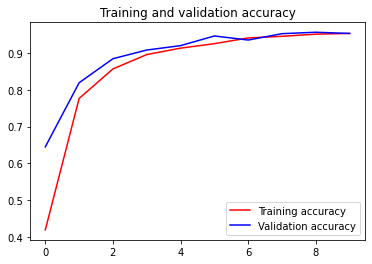

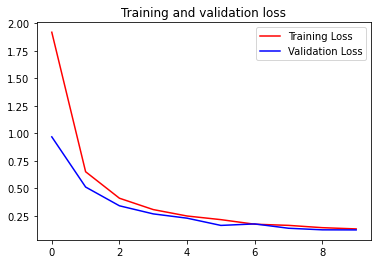

In [ ]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## Save and Load the Model

Save the Entire Model to HDF5 Format

In [ ]:
model.save('fruit_class_model.h5')

Load the Model

In [ ]:
loaded_model = tf.keras.models.load_model('fruit_class_model.h5')
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 128)        

## Predicting Sample Using Loaded Models

Create Dictionary for Labels

In [ ]:
#create dictionary of labels (kind of fruits)
fruit_dict_2={0: 'Apple Braeburn', 1: 'Apple Granny Smith', 2: 'Apricot', 3: 'Avocado', 4: 'Banana', 5: 'Blueberry', 6: 'Cactus fruit', 7: 'Cantaloupe', 8: 'Cherry', 9: 'Clementine', 10: 'Corn', 11: 'Cucumber Ripe', 12: 'Grape Blue', 13: 'Kiwi', 14: 'Lemon', 15: 'Limes', 16: 'Mango', 17: 'Onion White', 18: 'Orange', 19: 'Papaya', 20: 'Passion Fruit', 21: 'Peach', 22: 'Pear', 23: 'Pepper Green', 24: 'Pepper Red', 25: 'Pineapple', 26: 'Plum', 27: 'Pomegranate', 28: 'Potato Red', 29: 'Raspberry', 30: 'Strawberry', 31: 'Tomato', 32: 'Watermelon'}

Saving 0038.jpg to 0038.jpg


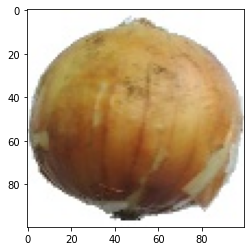

NameError: ignored

In [ ]:
import os
import numpy as np
from keras.preprocessing import image
from google.colab import files
import cv2

#takes input from user
os.chdir('/content')
sample_img = files.upload()
#get the filename
filename=next(iter(sample_img))

#show image
img = cv2.imread('/content/'+filename)
img_cvt=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_cvt)
plt.show()

img_cvt = cv2.resize(img_cvt,(100,100))
img_cvt = np.reshape(img_cvt,[1,100,100,3])

#Predicting the class
classes = loaded_model.predict(img_cvt)
print("This is "+fruit_dict_2[classes[0].tolist().index(1)])